In [1]:
import numpy as np
import matplotlib.pyplot as plt

# False Position

In [13]:
a = 8
b = 12
eps = 10**(-5)
x_i = a

f = lambda x: np.exp(-x)*np.cos(x)

while abs(b-a)>eps:
    x_i = (a * f(b) - b * f(a))/ (f(b) - f(a))
    if f(a)*f(x_i) < 0:
        b = x_i
    else:
        a = x_i
        
print("Root: %.5f" % x_i)

Root: 10.99557


# Fixed Point Iteration 1

Function

In [6]:
f = lambda x: x**2 + x - 5

Prove this function has a root in [1,2]

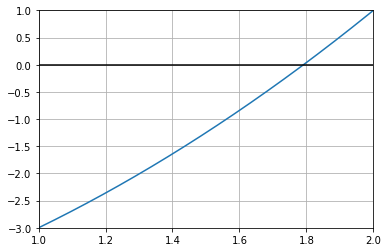

In [9]:
x = np.linspace(1,2,1000)
y = f(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid(True, which='both')
ax.set(xlim=(1, 2), ylim=(-3, 1))

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

We see there is a root in [1,2]


Now to finding function $g(x)$ that could be used as a fixed point iteration formula

Function $f(x) = x^2 + x - 5$ can be solved by the fixed point iteration by rearranging $f(x)$ analogically to the slide 38 in the presentation to the form $x(x+1) = 5 $ giving $g(x) = \frac{5}{x+1}$

In [7]:
x = 1.5
eps = 10**(-4)
g = lambda x: 5/(x+1)
analytical = (-1+np.sqrt(21))/2
analytical

1.79128784747792

In [11]:
while (abs(analytical-x)>eps):
    x = g(x)
print("Solution: %f " % x)
print("Divergence from the analytical solution: %f" %abs(analytical-x))

Solution: 1.791356 
Divergence from the analytical solution: 0.000068


# Fixed Point Iteration 2

# Iterative Methods

Let's define functions first. $f(x)$ is a given function, f_prime ($f'(x)$) if you will is a derivative, $g(x)$ is a guessing function for fixed point iteration, lambda_i is lambda estimate for fixed point method

In [59]:
eps = 10**(-5)
a = 0
b = 2
f = lambda x: x**3 - np.sin(x)
f_prime = lambda x: 3*x**2 - np.cos(x)
g = lambda x: np.power(np.sin(x), 1/3)
lambda_i = lambda x_i, x_i1, x_i2: (x_i - x_i1) / (x_i1 - x_i2)

def newton(x):
    return x - f(x)/f_prime(x)
    
def secant(x0, x1):
    return x1 - f(x1)*( (x1-x0) / (f(x1)-f(x0)) )
    
def fixed_point(x):
    return g(x)

This plot is just for convenience

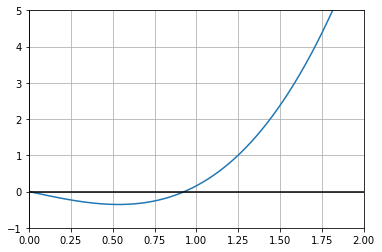

In [11]:
x = np.linspace(0,2,1000)
y = f(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid(True, which='both')
ax.set(xlim=(0, 2), ylim=(-1, 5))

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [65]:
i_fp = 1
i_n = 1
i_sec = 1

x_fp = 1
x_n = 1
x_sec = 1

print("Newton method")
x_n_next = newton(x_n)
while abs(x_n_next - x_n) >= eps:
    x_n = x_n_next
    x_n_next = newton(x_n)
    i_n += 1
print("Error: %.9f" %abs(x_n_next - x_n))
print("Result: %.9f" %x_n_next)
print("Iterations: %d" %i_n)
    
print("=====================")

print("Secant method")
x_sec_next = newton(x_sec)
while abs(x_sec_next - x_sec) >= eps:
    tmp = x_sec
    x_sec = x_sec_next
    x_sec_next = secant(tmp, x_sec_next)
    i_sec += 1
print("Error: %.9f" %abs(x_sec_next - x_sec))
print("Result: %.9f" %x_sec_next)
print("Iterations: %d" %i_sec)
    
print("=====================")

print("Fixed Point Method")
x0 = x_fp
while True:
    i_fp += 1
    x1 = g(x0)
    x2 = g(x1)
    lambda_2 = lambda_i(x_fp, x1, x2)
    x2_hat = x2 + (lambda_2/(1-lambda_2))*(x2-x1)
    if abs(x2_hat - x2) <= eps:
        print("Result: %.9f" %x2_hat)
        print("Iterations: %d" %i_fp)
        break
    else:
        x0 = x2_hat

Newton method
Error: 0.000000009
Result: 0.928626309
Iterations: 4
Secant method
Error: 0.000007910
Result: 0.928626318
Iterations: 4
Fixed Point Method
Result: 0.928639092
Iterations: 7


From the results above we can see, that Newton method gives most accurate results (I am surprised) and Fixed Point needs most iterations. However in all cases number of iterations is in single digits, which firstly surprises me, and secondly makes no difference between methods. 4 vs 7 iterations are distinguishable by humans.